In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving orders_qu.csv to orders_qu.csv


In [ ]:
uploaded1 = files.upload()

Saving orderlines_qu.csv to orderlines_qu.csv


In [ ]:
# orders_qu.csv
orders_qu = pd.read_csv('orders_qu.csv')

# orderlines_qu.csv
orderlines_qu = pd.read_csv('orderlines_qu.csv')

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_qu = pd.read_csv(path)

In [ ]:
orders = orders_qu.copy()
orderlines = orderlines_qu.copy()
products = products_qu.copy()

In [ ]:
merged_df = orderlines.merge(products, how = 'inner', on = 'sku')
merged_df['discount'] = merged_df.price - merged_df.unit_price
merged_df

,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,in_stock,type,discount
0,1119116,299545,0,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
1,1120182,299404,0,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,13.50
2,1121550,300650,0,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
3,1121801,300760,0,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
4,1124334,301975,0,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,1,12755395,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53226,1647280,526003,0,1,NET0028,404.99,2018-03-12 15:59:19,404.99,Netgear Wifi Orbi System kit and satellite net...,System RBK50 Mesh WiFi network kit compact and...,429.99,0,1334,25.00
53227,1647425,526066,0,1,WAC0254,83.99,2018-03-12 17:45:42,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53228,1647495,526093,0,1,WAC0252,83.99,2018-03-12 18:32:29,83.99,Education - Wacom Intuos Graphics Tablet S Blu...,small-edge graphics tablet with Bluetooth inte...,99.00,1,1405,15.01
53229,1648399,526440,0,1,PAC2235,878.18,2018-03-13 15:08:27,878.18,Synology DS218 + NAS Server | 6GB RAM | 16TB (...,NAS storage server integrated with special foc...,1124.98,1,12175397,246.80


In [ ]:
# checking for negative values
(merged_df.discount < 0).sum().sum()

1571

In [ ]:
merged_df.unit_price_total.sum()

7817204.4

In [ ]:
# removing the negative values
merged_df = merged_df.loc[merged_df.discount > 0]
(merged_df.discount < 0).sum().sum()

0

In [ ]:
# adding discount in percentages
merged_df['discount_%'] = (merged_df.discount * 100)/merged_df.price

<ipython-input-10-1ab2295a999b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['discount_%'] = (merged_df.discount * 100)/merged_df.price


In [ ]:
# removing some columns because it's easier without them
#merged_df = merged_df.drop(columns=["type", "id", "product_id", "desc", "in_stock"])
merged_df = merged_df.drop(columns=["id", "product_id", "in_stock"])

In [ ]:
merged_df.head(10)

,id_order,product_quantity,sku,unit_price,date,unit_price_total,name,desc,price,type,discount,discount_%
0,299545,1,OWC0100,47.49,2017-01-01 01:46:16,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.5,22.134776
1,299404,1,OWC0100,47.49,2017-01-01 22:50:39,47.49,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,13.5,22.134776
2,300650,1,OWC0100,49.99,2017-01-02 15:31:09,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
3,300760,1,OWC0100,49.99,2017-01-02 17:20:31,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
4,301975,1,OWC0100,49.99,2017-01-03 20:04:54,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
5,302293,5,OWC0100,49.99,2017-01-04 09:32:44,249.95,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
6,303599,1,OWC0100,49.99,2017-01-06 13:20:43,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
7,296253,1,OWC0100,49.99,2017-01-08 12:11:12,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
8,305687,1,OWC0100,49.99,2017-01-09 13:18:35,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744
9,307908,1,OWC0100,49.99,2017-01-12 12:23:49,49.99,OWC In-line Digital Temperature Sensor Kit HDD...,Kit temperature sensor for HDD iMac 21 inch an...,60.99,12755395,11.0,18.035744


##  Does revenue grow when discounts increase?

In [ ]:
merged_df["date"] = pd.to_datetime(merged_df["date"])
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49404 entries, 0 to 53230
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_order          49404 non-null  int64         
 1   product_quantity  49404 non-null  int64         
 2   sku               49404 non-null  object        
 3   unit_price        49404 non-null  float64       
 4   date              49404 non-null  datetime64[ns]
 5   unit_price_total  49404 non-null  float64       
 6   name              49404 non-null  object        
 7   desc              49404 non-null  object        
 8   price             49404 non-null  float64       
 9   type              49400 non-null  object        
 10  discount          49404 non-null  float64       
 11  discount_%        49404 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 4.9+ MB


In [ ]:
merged_df["discount_%"].mean()

23.239168119250532

In [ ]:
# revenue count for january 2017
january_2017 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017 = january_2017.unit_price_total.sum()
# revenue count for february 2017
february_2017 = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2017)]
february_2017 = february_2017.unit_price_total.sum()

# increase or decrease in percentages
revenue_Growth1 = ((february_2017 - january_2017)/january_2017)*100
print("Change: ", revenue_Growth1, "%")
# The revenue has dropped 46.2% in february when they offered on average smaller discounts

Change:  -46.177925705091624 %


In [ ]:
# analyze the discounts in january and february
january_2017_discounts = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017_discounts = january_2017_discounts['discount_%'].mean()
january_2017_discounts # avg discounts offered in january are 27.75%

february_2017_discounts = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2017)]
february_2017_discounts = february_2017_discounts["discount_%"].mean()
february_2017_discounts # avg discounts offered in february are 22.4%

print(january_2017_discounts, february_2017_discounts)

27.74962017815125 22.41800225452928


Conclusion: The revenue dropped in february, but also did the discounts!

The reason can also be smaller demand

In [ ]:
# calculating discounts that are offered by month and sorting them
(
    merged_df
    .groupby([merged_df["date"].dt.year, 
              merged_df["date"].dt.month])["discount_%"]
    .mean()
    .sort_values(ascending = False)
 )

date  date
2017  1       27.749620
      7       27.144754
      3       24.141249
2018  3       23.903479
      2       23.730340
2017  10      23.691314
2018  1       23.493058
2017  11      22.563289
      8       22.543930
      9       22.508217
      2       22.418002
      4       20.811254
      6       20.365965
      12      20.314476
      5       18.293660
Name: discount_%, dtype: float64

In [ ]:
# now I am comparing the revenue between months with max discounts offered and months with min discounts offered
# in this case January, 2017 & May, 2017

# revenue count for january 2017m already did that in the previous section
january_2017 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2017)]
january_2017 = january_2017.unit_price_total.sum()
# revenue count for may 2017
may_2017 = merged_df.loc[(merged_df.date.dt.month == 5) & (merged_df.date.dt.year == 2017)]
may_2017 = may_2017.unit_price_total.sum()

# increase in percentages when discounts are offered --- ((final value - initial value)/initial)*100
revenue_Growth_July_May = ((january_2017 - may_2017)/may_2017)*100
print(revenue_Growth_July_May)
print("Income in May: ", may_2017)
print("Income in January: ", january_2017)
# There is a difference and increase in profit 84 % when the discounts are offered
# The number increases by 84 % its original value

# decrease in %
decrease = ((may_2017 - january_2017)/ january_2017) * 100
decrease # 45.6 %

83.98441995756045
Income in May:  280733.51
Income in January:  516505.92


-45.6475716677168

In [ ]:
# Another check is grouping the first couple of months with bigger discount offer and the last couple of months
# with the smaller offer

months_with_bigger_discounts = (
    merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2017-07") 
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-01")
    | (merged_df.date.dt.strftime("%Y-%m") == "2018-03")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-03")]
    )
months_with_bigger_discounts = months_with_bigger_discounts.unit_price_total.sum()

months_with_smaller_discounts = (
    merged_df.loc[(merged_df.date.dt.strftime("%Y-%m") == "2017-12") 
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-04")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-05")
    | (merged_df.date.dt.strftime("%Y-%m") == "2017-06")]
    )
months_with_smaller_discounts = months_with_smaller_discounts.unit_price_total.sum()

decrease_in_percentages = ((months_with_bigger_discounts - months_with_smaller_discounts)/months_with_smaller_discounts) * 100
increase_in_percentages = ((months_with_smaller_discounts - months_with_bigger_discounts)/months_with_bigger_discounts) * 100
print(months_with_smaller_discounts,months_with_bigger_discounts)

1676364.01 1285170.77


In [ ]:
# One last check is comparing last months in the data set. 
# Janury, February and Mar, 2018
jan_2018 = merged_df.loc[(merged_df.date.dt.month == 1) & (merged_df.date.dt.year == 2018)]
jan_2018 = jan_2018.unit_price_total.sum()
jan_2018 # 825.957

feb_2018 = merged_df.loc[(merged_df.date.dt.month == 2) & (merged_df.date.dt.year == 2018)]
feb_2018 = feb_2018.unit_price_total.sum()
feb_2018 # 494.539

mar_2018 = merged_df.loc[(merged_df.date.dt.month == 3) & (merged_df.date.dt.year == 2018)]
mar_2018 = mar_2018.unit_price_total.sum()
mar_2018 # 206.422

# discounts are aprox. the same, but the income is very different

206422.12

In [ ]:
# Which months did the company earn the most?
(
    merged_df.groupby([merged_df["date"].dt.year, merged_df["date"].dt.month])['unit_price_total']
    .sum().sort_values(ascending = False)
)

date  date
2017  11      1472841.97
      12       955958.68
2018  1        825956.89
2017  7        543399.03
      1        516505.92
      10       510733.95
2018  2        494538.64
2017  9        355711.06
      8        342811.93
      5        280733.51
      2        277994.20
      6        233123.87
      4        206547.95
2018  3        206422.12
2017  3         18843.70
Name: unit_price_total, dtype: float64

I don't think there is any special connection to discounts, because the highest earning months are not offering the highest discounts.
However discounts shouldn't be abolished completely because they attract customers?

In [ ]:
t = (
    merged_df
    .groupby([merged_df["date"].dt.year, merged_df["date"].dt.month])
    .agg({'discount_%':'mean', 'unit_price_total':'sum'})
    )
t

discount_%  unit_price_total
date date                              
2017 1      27.749620         516505.92
     2      22.418002         277994.20
     3      24.141249          18843.70
     4      20.811254         206547.95
     5      18.293660         280733.51
     6      20.365965         233123.87
     7      27.144754         543399.03
     8      22.543930         342811.93
     9      22.508217         355711.06
     10     23.691314         510733.95
     11     22.563289        1472841.97
     12     20.314476         955958.68
2018 1      23.493058         825956.89
     2      23.730340         494538.64
     3      23.903479         206422.12

## How categories affect discounts & profit?
Firstly visualize categories and then calculate discounts and profit!

In [ ]:
# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
category_type_df = products_qu.copy()
brands = brands.copy()
category_type_df['short'] = category_type_df['sku'].str.slice(0, 3)
category_type_df = category_type_df.merge(brands, on = 'short')

category_type_df["category"] = ""

In [ ]:
category_type_df.loc[category_type_df["type"] == "12175397", "category"] = "servers"
# mobile phone and laptop cases protection, digital pens..
category_type_df.loc[category_type_df["type"].isin(["12635403","11821715", "11865403","11905404", "13835403","24215399","5720","1229","42945397","8696", "5,49E+11","13555403","1216","5405","2449"]),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df.name.str.contains("case",case=False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("folio", case = False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("cover", case = False)),"category"] = "tech accessories"
category_type_df.loc[category_type_df["type"].isin(["24895185","24885185"]), "category"] = "smart watches"
category_type_df.loc[category_type_df["type"].isin(["1282","5,74E+15","2158","1,02E+12","118692158","5,39E+11","2,16E+11","21632158","2,17E+11"]), "category"] = "apple computers&laptops"
category_type_df.loc[category_type_df["type"].isin(["57445397","1364","42945397"]), "category"] = "storage"
category_type_df.loc[category_type_df["type"].isin(["1230","12585395","5395","1325"]), "category"] = "adapters & cables"
# batteries, headsets, keyboards, speaker
category_type_df.loc[category_type_df["type"].isin(["13615399","5399","1296","1515","13005399","13855401","5384","5398"]), "category"] = "computer parts"
category_type_df.loc[category_type_df["type"].isin(["1433","12215397","12655397","12995397","11935397"]), "category"] = "storage"
category_type_df.loc[category_type_df["type"].isin(["1334","11935397"]), "category"] = "network devices"
category_type_df.loc[category_type_df["type"].isin(["1,44E+11"]), "category"] = "repair services"
category_type_df.loc[category_type_df["type"].isin(["1405"]), "category"] = "tablets"
category_type_df.loc[category_type_df["type"].isin(["1392","21485407","12645406","14305406","21535407"]), "category"] = "others"
category_type_df.loc[category_type_df["type"].isin(["85651716","51601716","1716"]), "category"] = "smartphone"
category_type_df.loc[category_type_df["type"].isin(["1298"])&(category_type_df.desc.str.contains("monitor",case=False))&(category_type_df.price > 200),"category"] = "computer parts"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df.desc.str.contains("server",case=False)),"category"] = "servers"
category_type_df.loc[(category_type_df["type"] == "1298")&(category_type_df['name'].str.contains("adapter", case = False)),"category"] = "adapters & cables"
category_type_df.loc[category_type_df["type"].isin(["1298"])&(category_type_df.price <100)&(category_type_df["name"].str.contains("cable", case = False)),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.name.str.contains("iPad"))&(category_type_df.price > 400),"category"] = "tablets"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.price > 400)&(category_type_df.name.str.contains("iPhone")),"category"] = "smartphone"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.price > 400)&(category_type_df.name.str.contains("iMac")),"category"] = "apple computers&laptops"
category_type_df.loc[(category_type_df.category.isin([""]))&(category_type_df.desc.str.contains("memory",case = False)),"category"] = "storage"
category_type_df.loc[(category_type_df["type"].isin(["1298"]))&(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["desc"].str.contains("drive", case = False)),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["name"].str.contains("cable", case = False)),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price <100)&(category_type_df["name"].str.contains("case", case = False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price >400)& (category_type_df["name"].str.contains("Mac"))&(category_type_df.long == "Apple"),"category"] = "apple computers&laptops"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.price >300)& (category_type_df["name"].str.contains("iPad")),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df["name"].str.contains("tablet")),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.desc.str.contains("connector"))&(category_type_df.price < 100),"category"] = "adapters & cables"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.desc.str.contains("GB", case=False))&(category_type_df.desc.str.contains("SSD")),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("installation", case = False)), "category"] = "repair services"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("drive")),"category"] = "storage"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("iPad",case=False))&(category_type_df.price >200),"category"] = "tablets"
category_type_df.loc[(category_type_df.category == "")&(category_type_df.name.str.contains("iPad",case=False))&(category_type_df.price <100)&(~category_type_df.desc.str.contains("service", case=False)),"category"] = "tech accessories"
category_type_df.loc[(category_type_df.category == ""),"category"] = "others"

In [ ]:
category_type_df.category.value_counts() 

tech accessories           2963
apple computers&laptops    1156
storage                    1028
servers                     955
others                      900
computer parts              772
network devices             669
adapters & cables           549
tablets                     265
smartphone                  262
repair services             153
smart watches               134
Name: category, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

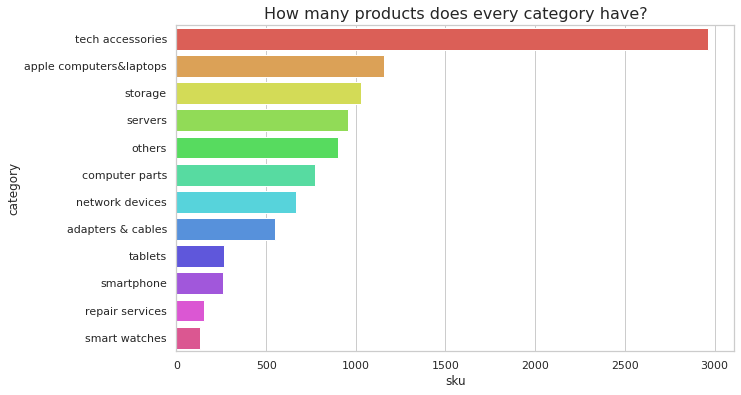

In [ ]:
# Visualize our categories by count
categories = category_type_df.groupby("category")["sku"].count().sort_values(ascending = False)
# converting that to df
categories = categories.to_frame().reset_index()

plot = sns.set(rc = {'figure.figsize':(10,6)})
plot = sns.set(style="whitegrid")
plot = (sns.barplot(x = 'sku',
                    y = 'category',
                    data = categories,
                    orient = "h",
                    palette = 'hls',
                    capsize = 0.05,             
                    saturation = 4).set_title("How many products does every category have?", fontsize = 16))

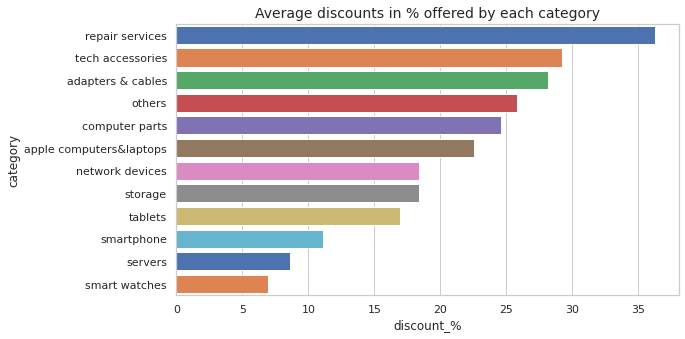

In [ ]:
# Discounts offered by each category
m = category_type_df.merge(merged_df,how = "inner", on ="sku")

discounts_by_categories = m.groupby("category")["discount_%"].mean().sort_values(ascending = False)
discounts_by_categories = discounts_by_categories.to_frame().reset_index()
discounts_by_categories
plot_1 = sns.set(rc = {'figure.figsize':(9,5)})
plot_1 = sns.set(style="whitegrid")
plot_1 = (sns.barplot(x = 'discount_%',
                      y = 'category',
                      data = discounts_by_categories,
                      orient = "h",
                      palette = 'deep',
                      capsize = 0.05,             
                      saturation = 4).set_title("Average discounts in % offered by each category", fontsize = 14))

In [ ]:
m.groupby("category")["discount_%"].mean()

category
adapters & cables          28.148663
apple computers&laptops    22.576152
computer parts             24.597114
network devices            18.390655
others                     25.809977
repair services            36.235906
servers                     8.596444
smart watches               6.927890
smartphone                 11.097966
storage                    18.348372
tablets                    16.959391
tech accessories           29.244088
Name: discount_%, dtype: float64

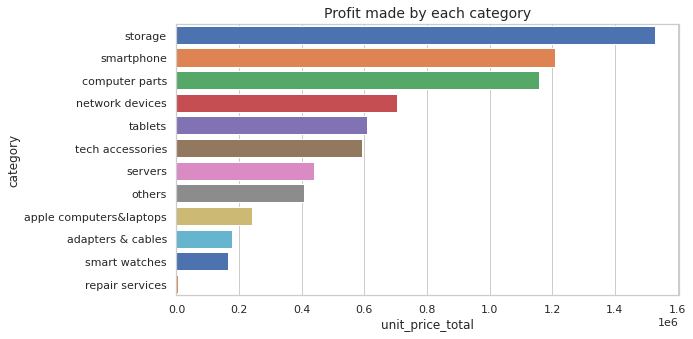

In [ ]:
# Profit made by categories
profit_by_categories = m.groupby("category")["unit_price_total"].sum().sort_values(ascending = False)
profit_by_categories = profit_by_categories.to_frame().reset_index()
profit_by_categories
plot_2 = sns.set(rc = {'figure.figsize':(9,5)})
plot_2 = sns.set(style="whitegrid")
plot_2 = (sns.barplot(x = 'unit_price_total',
                      y = 'category',
                      data = profit_by_categories,
                      orient = "h",
                      palette = 'deep',
                      capsize = 0.05,             
                      saturation = 4).set_title("Profit made by each category", fontsize = 14))

In [ ]:
q = (
    merged_df
    .groupby([merged_df["date"].dt.quarter,merged_df["date"].dt.year])
    .agg({'discount_%':'mean', 'unit_price_total':'sum'})
    )
q

discount_%  unit_price_total
date date                              
1    2017   26.125636         813343.82
     2018   23.629947        1526917.65
2    2017   19.755919         720405.33
3    2017   24.593836        1241922.02
4    2017   22.027639        2939534.60

In [ ]:
# Calculating revenue by brand and also calculating discounts by brand to see if there is a relationship
g = m.groupby("long").agg({"unit_price_total":"sum","discount_%": "mean","sku":"count"}).nlargest(5,"unit_price_total").reset_index()
g["discount_%"].mean() # 19.8 - less than average for all discounts
g

,long,unit_price_total,discount_%,sku
0,Apple,2328174.49,18.274989,10648
1,Pack,461767.81,26.184427,2664
2,OWC,447347.14,22.912044,3414
3,LaCie,403765.36,13.194943,1873
4,Western Digital,359900.11,18.366874,1850


In [ ]:
m.groupby([m["date"].dt.year,m["date"].dt.month,m.long]).agg({"unit_price_total":"sum","discount_%": "mean"}).nlargest(25,"unit_price_total")

unit_price_total  discount_%
date   date long                                         
2017.0 11.0 Apple                   535071.04   17.782342
       12.0 Apple                   422660.45   11.858120
2018.0 1.0  Apple                   287338.53   15.654119
2017.0 7.0  Apple                   231870.85   21.215029
       10.0 Apple                   165427.35   15.816642
2018.0 2.0  Apple                   149979.59   14.606012
2017.0 9.0  Apple                   129564.02   17.361516
       8.0  Apple                    96316.81   22.020737
       11.0 LaCie                    76403.49   17.030834
            Pack                     65052.15   21.843407
            Western Digital          64183.27   22.110435
            LG                       63876.59   12.225631
            Wacom                    63710.10   23.629357
       5.0  Apple                    63325.07   13.988464
       1.0  Apple                    62704.51   32.978235
       11.0 Crucial                  60161.26   17.518680
       6.0  Apple                    58801.86   17.227963
       11.0 Synology                 57014.94    6.778492
            OWC                      56778.68   24.309804
            Dell                     55586.85   17.917941
            Sonos                    52041.30   15.180591
       1.0  Pack                     51605.57   22.436961
2018.0 3.0  Apple                    51231.39   22.771539
2017.0 10.0 LaCie                    48742.25   10.969238
2018.0 1.0  LaCie                    47609.91   15.585344

([<matplotlib.axis.YTick at 0x7f2675771100>,
 [Text(0, 0, 'Jan'), Text(0, 0, 'Feb'), Text(0, 0, 'Mar')])

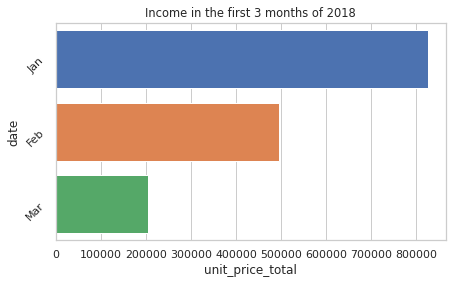

In [ ]:
# Visualisation of the first quarter of year 2018
p = m.resample("M", on = "date").agg({"unit_price_total":"sum"})
p = p.reset_index()
p = p.loc[p.date.dt.year == 2018, :]
pl = sns.set(rc = {'figure.figsize':(7,4)})
pl = sns.set(style="whitegrid")
pl = (sns.barplot(x = 'unit_price_total',
                  y = 'date',
                  data = p,
                  orient = "h",
                  palette = 'deep',
                  capsize = 0.05,            
                  saturation = 4).set_title("Income in the first 3 months of 2018", fontsize = 11.5))
plt.yticks(range(3), ['Jan','Feb','Mar'], rotation=45)

In [ ]:
# Calculating revenue by brand and also calculating discounts by brand to see if there is a relationship
g = m.groupby("long").agg({"unit_price_total":"sum","discount_%": "mean","sku":"count"}).nlargest(15,"unit_price_total").reset_index()
g["discount_%"].mean() # 19.8 - less than average for all discounts

17.839644912293693